## **Technical Report**
```
Unemployment Trends Pre- and Post-COVID
Objective
- Analyze unemployment rate (percentage) pre- and post-COVID.
- Clean and explore data using Python.
- Visualize trends and seasonal patterns.
- Investigate COVID-19 impact (descriptive + simple statistical testing).
- Provide insights to inform economic or social policy.
```



In [1]:
# library used for this task
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [4]:
# loading the unemployment dataset
df1 = pd.read_csv("/Unemployment in India.csv")
df2 = pd.read_csv("/Unemployment_Rate_upto_11_2020.csv")

In [5]:
# picking out the intersecting features to enable data merging
columns_needed = list(set(df1).intersection(df2))

In [6]:
# subsetting data
df1 = df1[columns_needed]
df2 = df2[columns_needed]

# merging both dataframes
df = pd.concat([df1, df2], axis=0, ignore_index=True)
df.columns = df.columns.str.strip()

## Data cleaning plan

```
- Identify a date column and an unemployment percentage column.
- Parse dates into `date_parsed`.
- Identify outliers in the dataset via boxplot.
- Set the lower and upper limit cut-off point to remove outliers.
- Plot a boxplot to confirm outliers were effectively dealt with.
```


In [7]:
# data cleaning process
df =df.dropna()
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df = df.sort_values('Date').reset_index(drop=True)

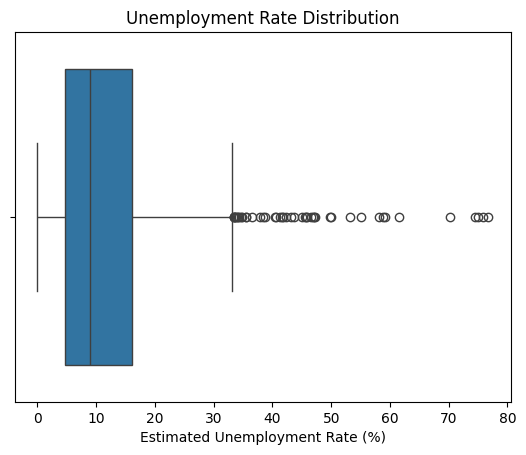

In [8]:
# check and filter outliers
sns.boxplot(x=df['Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Distribution')
plt.show()

In [9]:
lower_cutoff = df['Estimated Unemployment Rate (%)'].quantile(0.05)
upper_cutoff = df['Estimated Unemployment Rate (%)'].quantile(0.95)
df = df[
    (df['Estimated Unemployment Rate (%)'] >= lower_cutoff) &
    (df['Estimated Unemployment Rate (%)'] <= upper_cutoff)
]

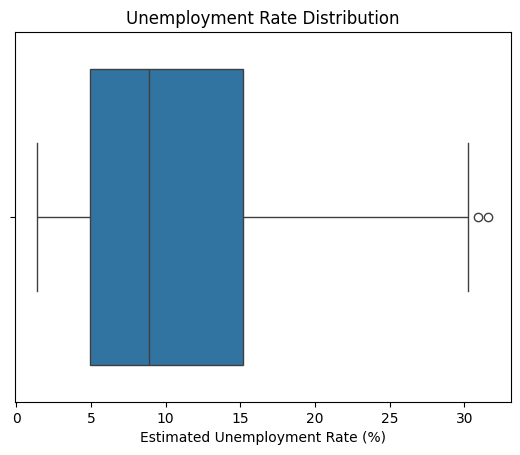

In [10]:
# check and filter outliers
sns.boxplot(x=df['Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Distribution')
plt.show()

# Evaluating Unemployment Rate


```
•  Line Plot: It clearly shows how unemployment changes over time, making it easy to spot trends, seasonal patterns, and shocks like COVID-19.

•  Mean: It provides a simple summary of the overall unemployment level, useful for comparing regions or time periods.

•  t-test: It checks whether differences in unemployment (e.g., before vs. during COVID-19) are statistically meaningful rather than random.

•  p-value: It confirms the reliability of the t-test result by indicating whether the observed difference is significant.
```





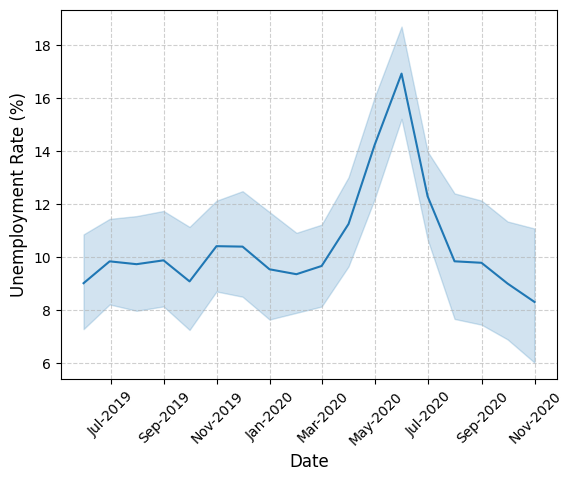

In [12]:
sns.lineplot(data=df, x= 'Date', y= 'Estimated Unemployment Rate (%)')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.xticks(rotation=45)
plt.show()

In [15]:
# descriptive statistics
desc = df['Estimated Unemployment Rate (%)'].describe()
print(desc)

pre_covid = df[df['Date'] < '2020-03-01']
post_covid = df[df['Date'] >= '2020-03-01']

mean_pre = pre_covid['Estimated Unemployment Rate (%)'].mean()
mean_post = post_covid['Estimated Unemployment Rate (%)'].mean()

print("Pre-COVID mean:", mean_pre.round(2))
print("Post-COVID mean:", mean_post.round(2))

count    905.000000
mean      10.685392
std        7.082578
min        1.420000
25%        4.950000
50%        8.890000
75%       15.160000
max       31.610000
Name: Estimated Unemployment Rate (%), dtype: float64
Pre-COVID mean: 9.68
Post-COVID mean: 12.22


In [19]:
t_stat, p_value = ttest_ind(
    pre_covid['Estimated Unemployment Rate (%)'],
    post_covid['Estimated Unemployment Rate (%)'],
    equal_var=False
)
print("t-statistic:", t_stat.round(4))
print("p-value:", p_value.round(4))

t-statistic: -5.2476
p-value: 0.0


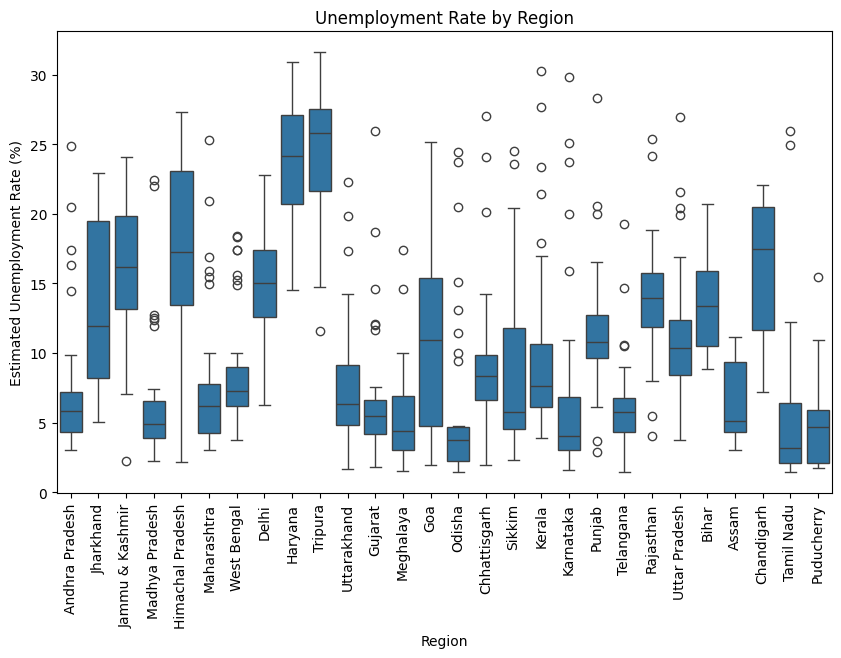

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='Estimated Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Region')
plt.show()

## **Zoning Regions**

Dividing regions into broader geographic zones helps reveal unemployment patterns that individual states alone cannot show. First, states within the same zone often share similar economic structures—such as agricultural dependency in the North or industrial corridors in the West—which influence labour demand in comparable ways. Second, many national development and employment policies are organised and evaluated by zones, so analysing unemployment this way aligns your findings with real-world policy frameworks. Finally, zones capture important cultural and demographic similarities, including migration behaviour and education levels, which shape how people enter and participate in the labour market. Grouping regions into zones therefore creates a clearer, more meaningful picture of how geography drives unemployment differences.

In [21]:
# Create a mapping of states/regions to zones
zone_map = {
    'Andhra Pradesh': 'South', 'Karnataka': 'South', 'Kerala': 'South', 'Tamil Nadu': 'South', 'Telangana': 'South',
    'Delhi': 'North', 'Haryana': 'North', 'Punjab': 'North', 'Rajasthan': 'North', 'Uttarakhand': 'North',
    'Bihar': 'East', 'Jharkhand': 'East', 'Odisha': 'East', 'West Bengal': 'East',
    'Goa': 'West', 'Gujarat': 'West', 'Maharashtra': 'West',
    'Chhattisgarh': 'Central', 'Madhya Pradesh': 'Central', 'Uttar Pradesh': 'Central',
    'Assam': 'Northeast', 'Tripura': 'Northeast', 'Nagaland': 'Northeast', 'Meghalaya': 'Northeast'
}

# Apply mapping
df['Zone'] = df['Region'].map(zone_map)

In [28]:
# Mean unemployment rate per region
region_summary = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

# Mean unemployment rate per Zone
zone_summary = df.groupby('Zone')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)

/tmp/ipython-input-4246332104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_summary.values, y=region_summary.index, palette='coolwarm')


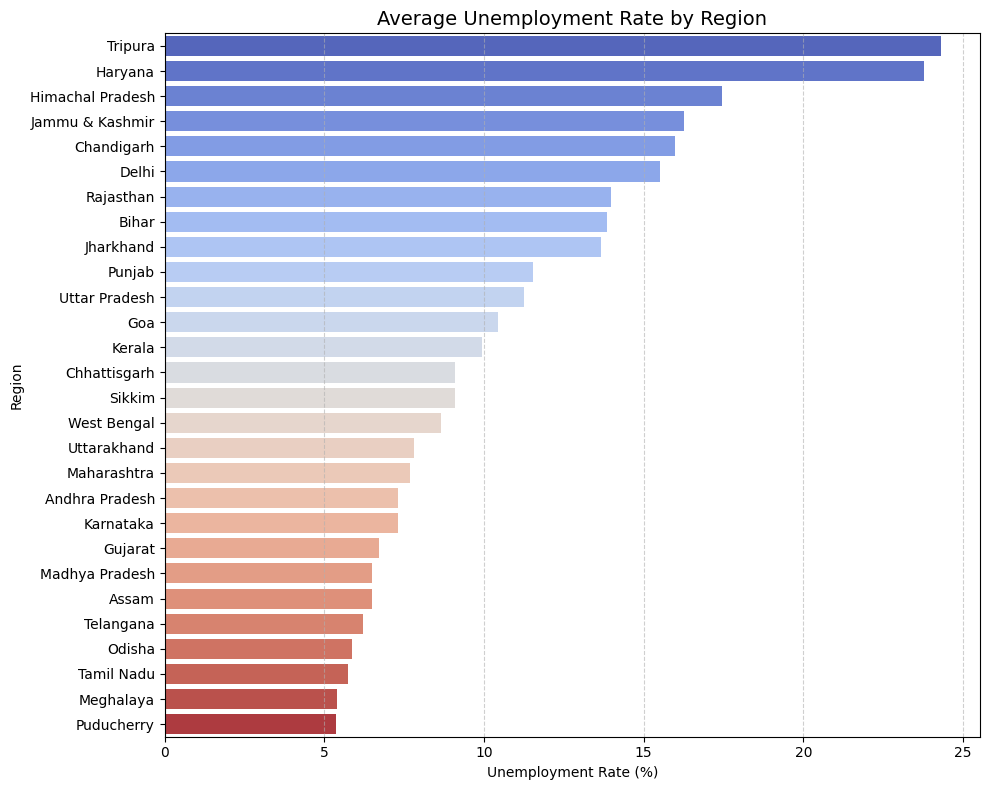

In [25]:
plt.figure(figsize=(10,8))
sns.barplot(x=region_summary.values, y=region_summary.index, palette='coolwarm')
plt.title('Average Unemployment Rate by Region', fontsize=14)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Region')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show();

/tmp/ipython-input-2447663956.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_summary.index, y=zone_summary.values, palette='Spectral')


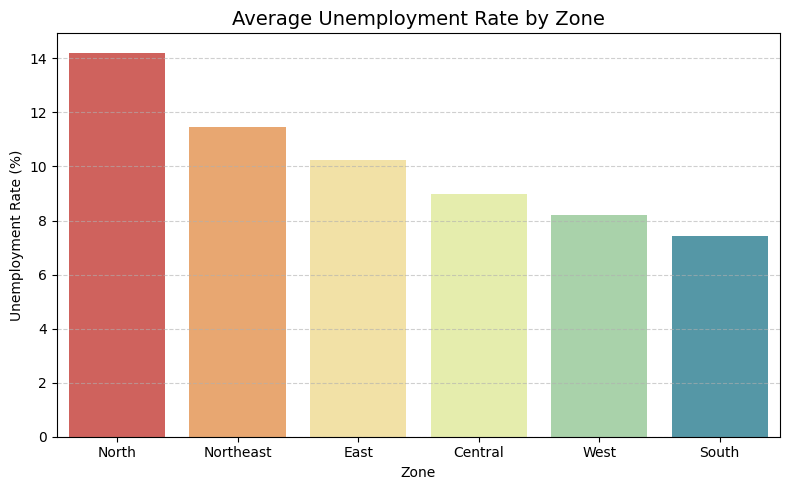

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x=zone_summary.index, y=zone_summary.values, palette='Spectral')
plt.title('Average Unemployment Rate by Zone', fontsize=14)
plt.xlabel('Zone')
plt.ylabel('Unemployment Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show();

# **Executive Summary**

•  After merging and cleaning the two provided datasets and trimming extreme values (5th–95th percentile), the dataset retained 905 observations.

•  The national-level unemployment series has ***mean ≈ 10.69% and standard deviation ≈ 7.08%***, indicating an elevated average unemployment and substantial variation across observations (by time and region).

•  A comparison of pre-COVID (before 2020-03-01) and post-COVID periods shows a statistically significant increase in unemployment: ***t = −5.25, p = 2.03×10⁻⁷ (Welch’s t-test)***. Reported p-value formatted: ***p < 0.001***.

•  Regional aggregation and zone mapping reveal systematic geographic differences; code computes mean unemployment per Region and per Zone (South, North, East, West, Central, Northeast) and visualizes them.

•  These findings point to the need for targeted, region-specific policy responses (job creation, skilling, safety nets), not only uniform national interventions.
